<a href="https://colab.research.google.com/github/Anurag-ghosh-12/FlowerClassification/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

In [2]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses_count=len(list(data_dir.glob('roses/*')))
roses_count

641

In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/5526964611_76ef13025c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5333437251_ce0aa6925d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg')]

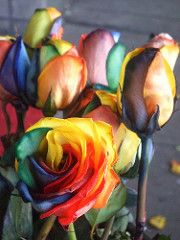

In [8]:
PIL.Image.open(str(roses[5]))

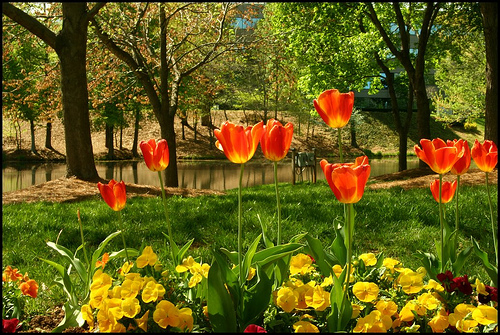

In [9]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[3]))

In [10]:
#just encoding the path names with their corresponding classes for easier implementation
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [11]:
#assigning labels
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [12]:
#open cv expects a string path so wrap it in a string
img =cv2.imread(str(flower_images_dict['roses'][0]))

In [13]:
img.shape#converted to numpy array

(333, 500, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X,y=[],[]
X=list(X)
y=list(y)


In [16]:
for flower_name,images in flower_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])


array([[[ 77,  63, 141],
        [ 56,  42, 120],
        [ 39,  26, 111],
        ...,
        [104,  91, 166],
        [ 82,  74, 151],
        [ 44,  32, 127]],

       [[ 79,  66, 142],
        [ 60,  45, 126],
        [ 42,  27, 110],
        ...,
        [111, 100, 172],
        [ 98,  91, 162],
        [ 60,  50, 135]],

       [[ 81,  68, 142],
        [ 62,  47, 128],
        [ 45,  29, 112],
        ...,
        [113, 101, 173],
        [111, 101, 172],
        [ 81,  73, 150]],

       ...,

       [[ 13,  46,  32],
        [ 12,  47,  33],
        [ 12,  47,  33],
        ...,
        [ 61,  61,  66],
        [ 51,  51,  59],
        [ 41,  42,  52]],

       [[ 12,  47,  32],
        [ 11,  46,  32],
        [ 12,  46,  32],
        ...,
        [ 57,  56,  58],
        [ 51,  49,  55],
        [ 39,  41,  49]],

       [[ 11,  50,  30],
        [ 10,  45,  30],
        [ 13,  46,  31],
        ...,
        [ 51,  51,  53],
        [ 46,  46,  52],
        [ 39,  40,  49]]], dtype=uint8)
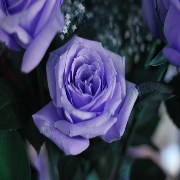

In [17]:
X[0]

In [18]:
X=np.array(X)
y=np.array(y)

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
X_train,X_test, y_train,y_test=train_test_split(X,y,random_state=0)

In [21]:
X_train_scaled=X_train/255

In [22]:
X_test_scaled=X_test/255

In [23]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers
model=Sequential(
    [
        layers.Conv2D(16,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),

        layers.Dense(128,activation='relu'),
        layers.Dense(5)
    ]
)

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 112s 1s/step - loss: 1.4001 - accuracy: 0.4015
Epoch 2/10
86/86 [==============================] - 89s 1s/step - loss: 1.0617 - accuracy: 0.5749
Epoch 3/10
86/86 [==============================] - 87s 1s/step - loss: 0.8746 - accuracy: 0.6566
Epoch 4/10
86/86 [==============================] - 86s 998ms/step - loss: 0.6873 - accuracy: 0.7471
Epoch 5/10
86/86 [==============================] - 87s 1s/step - loss: 0.4892 - accuracy: 0.8187
Epoch 6/10
86/86 [==============================] - 84s 978ms/step - loss: 0.2789 - accuracy: 0.9041
Epoch 7/10
86/86 [==============================] - 92s 1s/step - loss: 0.1558 - accuracy: 0.9549
Epoch 8/10
86/86 [==============================] - 91s 1s/step - loss: 0.0926 - accuracy: 0.9746
Epoch 9/10
86/86 [==============================] - 88s 1s/step - loss: 0.0463 - accuracy: 0.9873
Epoch 10/10
86/86 [==============================] - 88s 1s/step - loss: 0.0289 - accuracy: 0.9931


In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 15s 486ms/step - loss: 1.0538 - accuracy: 0.5850


[1.053808569908142, 0.584967315196991]

29/29 [==============================] - 15s 502ms/step


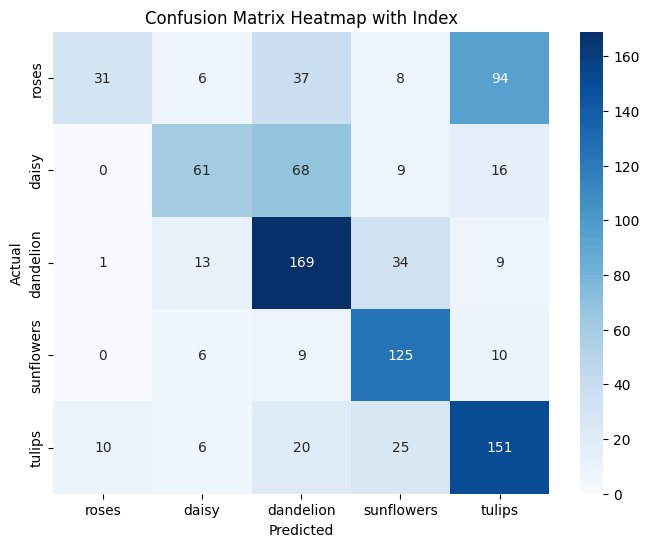

0 -> roses
1 -> daisy
2 -> dandelion
3 -> sunflowers
4 -> tulips


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from the model
y_pred = model.predict(X_test_scaled)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the actual class labels
y_true = y_test

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=flower_labels_dict.keys(), yticklabels=flower_labels_dict.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap with Index")
plt.show()

# Print the index of the heatmap
for i, j in enumerate(flower_labels_dict.keys()):
  print(f"{i} -> {j}")


In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers

In [25]:
import keras
img_height = 180
img_width = 180
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.3),
   layers.experimental.preprocessing.RandomZoom(0.5),

])

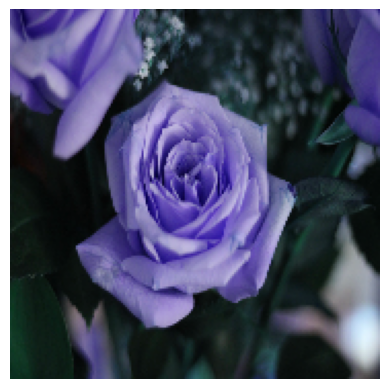

In [26]:
plt.axis('off')
plt.imshow(X[0])

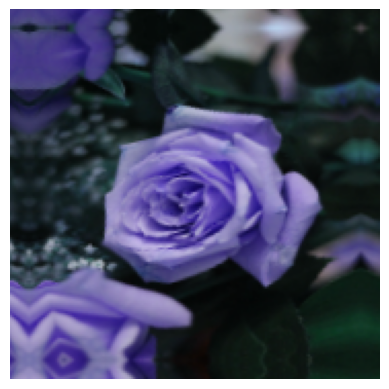

In [27]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras import layers
model=Sequential(
    [
        data_augmentation,
        layers.Conv2D(20,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(50,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(80,3,padding='same',activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.4),
        layers.Flatten(),

        layers.Dense(128,activation='relu'),
        layers.Dense(5)
    ]
)

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 155s 2s/step - loss: 1.3175 - accuracy: 0.4284
Epoch 2/10
86/86 [==============================] - 152s 2s/step - loss: 1.0818 - accuracy: 0.5603
Epoch 3/10
86/86 [==============================] - 149s 2s/step - loss: 0.9708 - accuracy: 0.6319
Epoch 4/10
86/86 [==============================] - 155s 2s/step - loss: 0.9200 - accuracy: 0.6432
Epoch 5/10
86/86 [==============================] - 158s 2s/step - loss: 0.8810 - accuracy: 0.6497
Epoch 6/10
86/86 [==============================] - 150s 2s/step - loss: 0.8225 - accuracy: 0.6741
Epoch 7/10
86/86 [==============================] - 154s 2s/step - loss: 0.8180 - accuracy: 0.6817
Epoch 8/10
86/86 [==============================] - 153s 2s/step - loss: 0.8007 - accuracy: 0.6751
Epoch 9/10
86/86 [==============================] - 152s 2s/step - loss: 0.7902 - accuracy: 0.6988
Epoch 10/10
86/86 [==============================] - 150s 2s/step - loss: 0.7664 - accuracy: 0.7060


In [36]:
model.evaluate(X_test_scaled,y_test)#increase in accuracy from 58% to 63%

29/29 [==============================] - 16s 529ms/step - loss: 0.9117 - accuracy: 0.6394


[0.9117456674575806, 0.6394335627555847]

29/29 [==============================] - 16s 541ms/step


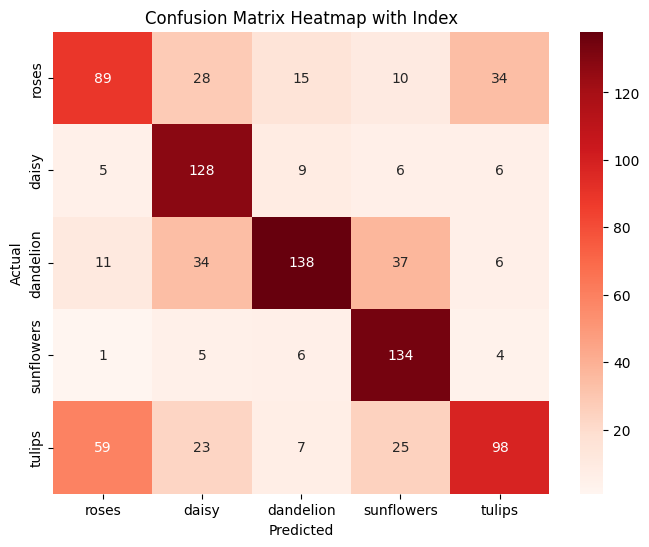

In [38]:
# Get predictions from the model
y_pred = model.predict(X_test_scaled)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Get the actual class labels
y_true = y_test

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=flower_labels_dict.keys(), yticklabels=flower_labels_dict.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap with Index")
plt.show()



In [39]:
model.save('flower_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
!pip install streamlit tensorflow numpy pillow matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00


In [42]:
np.save('X_test_scaled.npy', X_test_scaled)
np.save('y_test.npy', y_test)

29/29 [==============================] - 14s 492ms/step


DeltaGenerator()

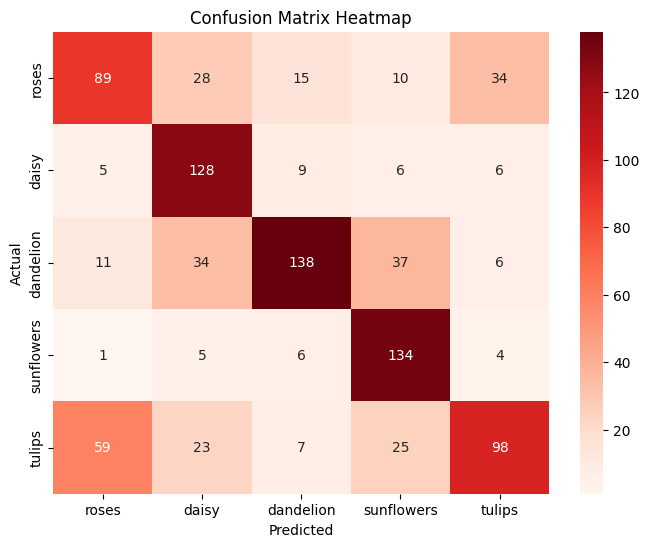

In [43]:
import streamlit as st
import tensorflow as tf
from keras.models import load_model
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the trained model
model = load_model('flower_classifier_model.h5')

# Dictionary to map labels
flower_labels_dict = {
    0: 'roses',
    1: 'daisy',
    2: 'dandelion',
    3: 'sunflowers',
    4: 'tulips'
}

# Function to preprocess the uploaded image
def preprocess_image(image):
    # Convert to grayscale
    image = ImageOps.grayscale(image)
    # Resize to 180x180 pixels
    image = image.resize((180, 180))
    # Convert to numpy array
    image = np.array(image)
    # Normalize the image
    image = image / 255.0
    # Reshape for the model
    image = image.reshape(1, 180, 180, 1)
    return image

# Streamlit UI
st.title("Flower Classification Model")

st.write("Upload an image of a flower and the model will predict the flower type.")

# File uploader
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Make predictions
    predictions = model.predict(preprocessed_image)
    predicted_label = np.argmax(predictions, axis=1)[0]
    predicted_flower = flower_labels_dict[predicted_label]

    st.write(f"Predicted Flower: {predicted_flower}")

# Evaluate the model and show accuracy
st.write("## Model Evaluation")

X_test_scaled = np.load('X_test_scaled.npy')  # Load preprocessed test data
y_test = np.load('y_test.npy')                # Load test labels

loss, accuracy = model.evaluate(X_test_scaled, y_test)
st.write(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
st.write("## Confusion Matrix Heatmap")

y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=list(flower_labels_dict.values()), yticklabels=list(flower_labels_dict.values()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
st.pyplot(plt)


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
